# Descomposición del IMAE por componentes

*Material del curso EC4301 Macroeconometría*

Universidad de Costa Rica

**Profesor:  Randall Romero Aguilar**

Actualizado: 2021-Aug-14

## Gráfico del IMAE

In [1]:
from bccr import SW
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.filters.hp_filter import hpfilter

figpath = '../figures/'

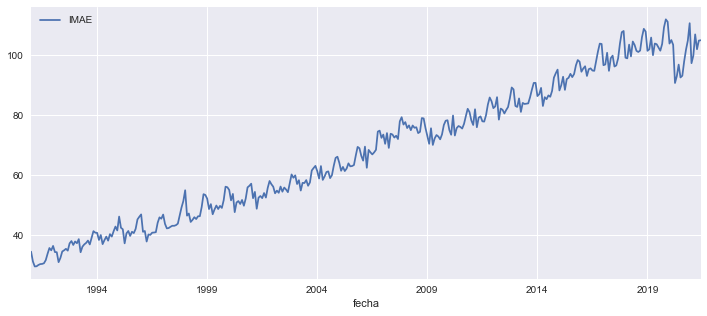

In [17]:
#imae = SW(IMAE=35449)  # serie anterior, no datos desde 2020-11
imae = SW(IMAE=87703)  # nueva serie
imae.plot(figsize=[12,5]);

## Componentes del IMAE

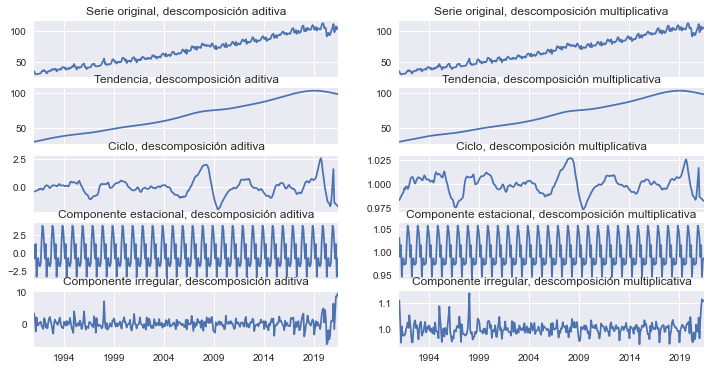

In [18]:
componentes = ['Serie original', 'Tendencia','Ciclo','Componente estacional','Componente irregular']

res = seasonal_decompose(imae, model='additive', period=12, extrapolate_trend='freq')
ciclo, tendencia = hpfilter(res.trend, lamb=14400)
additive = pd.concat([res.observed,tendencia, ciclo, res.seasonal, res.resid], axis=1)
additive.columns = componentes

res = seasonal_decompose(imae, model='multiplicative', period=12, extrapolate_trend='freq')
ciclo, tendencia = hpfilter(np.log(res.trend), lamb=14400)
multiplicative = pd.concat([res.observed, np.exp(tendencia), np.exp(ciclo), res.seasonal, res.resid], axis=1)
multiplicative.columns = componentes

descomp = pd.concat([additive, multiplicative], keys=['aditiva', 'multiplicativa'], axis=1)
descomp.index.name = ""
fig, axs = plt.subplots(5,2, figsize=[12,6], sharex=True)

for ((metodo, comp), serie), ax in zip(descomp.iteritems(), axs.T.flatten()):
    
    serie.plot(ax=ax, title=f'{comp}, descomposición {metodo}')

plt.gcf().savefig(figpath+'IMAE-descomposicion.pdf', bbox_inches='tight')
